In [1]:
%matplotlib inline
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
print sys.version
print "pandas.version:", pd.__version__

2.7.6 (default, Mar 22 2014, 22:59:56) 
[GCC 4.8.2]
pandas.version: 0.17.1


In [4]:
df = pd.read_csv('../../data/date_fixed_running_data.csv')

In [5]:
df.head(5)

,Unnamed: 0,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [7]:
df['Unnamed: 0'].head()

0    2014-08-02
1    2014-08-03
2    2014-08-04
3    2014-08-05
4    2014-08-06
Name: Unnamed: 0, dtype: object

In [26]:
df = pd.read_csv('../../data/date_fixed_running_data.csv', parse_dates=[0])
df.head()
df.dtypes

Unnamed: 0    datetime64[ns]
Miles                float64
Time                  object
dtype: object

In [27]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [28]:
df.dtypes

Unnamed: 0    datetime64[ns]
Miles                float64
Time                  object
dtype: object

In [29]:
cols = ['Date', 'Miles', 'Time']
df.columns = cols
df.head()

,Date,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [32]:
df.rename(columns={df.columns[0]:'date',}).head()

,date,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [33]:
df.set_index('Date', inplace=True)

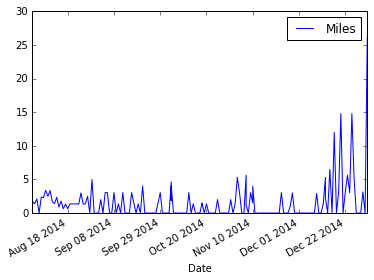

In [34]:
df.plot()

In [35]:
df.head(10)

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,0.00,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37


In [36]:
raw_time_fmt = df.Time[0]

In [37]:
raw_time_fmt

nan

In [56]:
def get_total_seconds(raw_time):
    if raw_time is np.nan:
        return raw_time
    hrs, mins, seconds = str(raw_time).split(":")
    seconds = float(seconds) + 60*float(mins) + 60*60*float(hrs)
    return seconds

        

In [57]:
get_total_seconds('0:28:37')

1717.0

In [58]:
df['Seconds'] = df.Time.map(get_total_seconds)

In [60]:
df.head(10)

,Miles,Time,Seconds
Date,,,
2014-08-02,1.70,NaN,NaN
2014-08-03,1.40,NaN,NaN
2014-08-04,2.10,NaN,NaN
2014-08-05,0.00,NaN,NaN
2014-08-06,2.38,NaN,NaN
2014-08-07,2.30,NaN,NaN
2014-08-08,3.40,NaN,NaN
2014-08-09,2.50,NaN,NaN
2014-08-10,3.36,0:28:37,1717


In [61]:
df.describe()

,Miles,Seconds
count,166.000000,52.000000
mean,1.530964,1901.788462
std,2.979802,2560.424171
min,0.000000,376.000000
25%,0.000000,583.750000
50%,0.000000,1343.500000
75%,2.007500,1743.250000
max,26.200000,15643.000000


In [62]:
df.fillna(0).describe()

,Miles,Seconds
count,166.000000,166.000000
mean,1.530964,595.740964
std,2.979802,1676.040290
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.007500,561.750000
max,26.200000,15643.000000


In [63]:
df['Minutes'] = df['Seconds'].map(lambda x : x/60)

In [64]:
df.head(10)

,Miles,Time,Seconds,Minutes
Date,,,,
2014-08-02,1.70,NaN,NaN,NaN
2014-08-03,1.40,NaN,NaN,NaN
2014-08-04,2.10,NaN,NaN,NaN
2014-08-05,0.00,NaN,NaN,NaN
2014-08-06,2.38,NaN,NaN,NaN
2014-08-07,2.30,NaN,NaN,NaN
2014-08-08,3.40,NaN,NaN,NaN
2014-08-09,2.50,NaN,NaN,NaN
2014-08-10,3.36,0:28:37,1717,28.616667


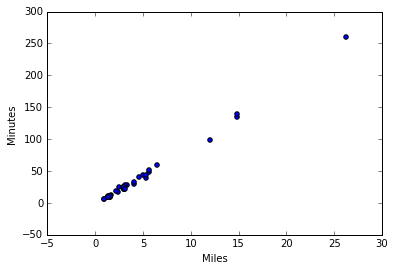

In [67]:
df.plot(x='Miles', y = 'Minutes', kind='scatter')

In [68]:
?df.corr

In [72]:
df.corr()

,Miles,Seconds,Minutes
Miles,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


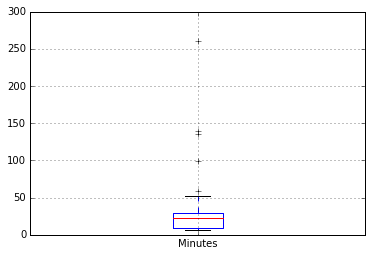

In [74]:
df.boxplot('Minutes', return_type='axes')

In [75]:
df['Minutes'] / df['Miles']

Date
2014-08-02          NaN
2014-08-03          NaN
2014-08-04          NaN
2014-08-05          NaN
2014-08-06          NaN
2014-08-07          NaN
2014-08-08          NaN
2014-08-09          NaN
2014-08-10     8.516865
2014-08-11     7.854291
2014-08-12     7.453052
2014-08-13     7.411348
2014-08-14     6.962963
2014-08-14     6.962963
2014-08-15          NaN
2014-08-16          NaN
2014-08-17          NaN
2014-08-18          NaN
2014-08-19          NaN
2014-08-19          NaN
2014-08-20     6.970803
2014-08-21     6.861314
2014-08-22     6.630170
2014-08-23          NaN
2014-08-24          NaN
2014-08-25     6.508516
2014-08-25          NaN
2014-08-26     7.664234
2014-08-27    10.000000
2014-08-28          NaN
                ...    
2014-12-04          NaN
2014-12-05          NaN
2014-12-06          NaN
2014-12-07          NaN
2014-12-08          NaN
2014-12-09     8.532423
2014-12-10          NaN
2014-12-11          NaN
2014-12-12     6.751825
2014-12-13     8.226415
2014-12-13 

In [76]:
df['Min_per_mile'] = df['Minutes'] / df['Miles']

In [77]:
df.describe()

,Miles,Seconds,Minutes,Min_per_mile
count,166.000000,52.000000,52.000000,52.000000
mean,1.530964,1901.788462,31.696474,7.725297
std,2.979802,2560.424171,42.673736,0.954475
min,0.000000,376.000000,6.266667,6.000000
25%,0.000000,583.750000,9.729167,7.020479
50%,0.000000,1343.500000,22.391667,7.533333
75%,2.007500,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


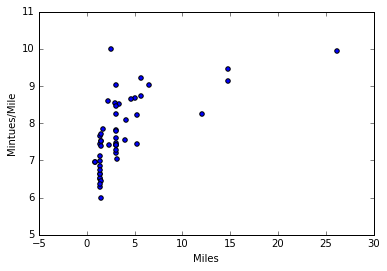

In [81]:
df.plot(x='Miles', y = 'Min_per_mile', kind='scatter')
plt.ylabel('Mintues/Mile')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f635db21450>]], dtype=object)

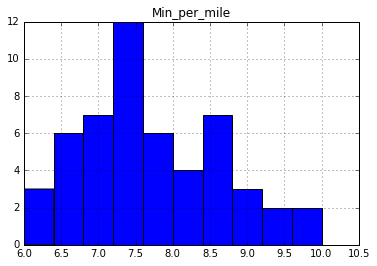

In [82]:
df.hist('Min_per_mile')#show the frequency of min_per_mild

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f635da50f10>]], dtype=object)

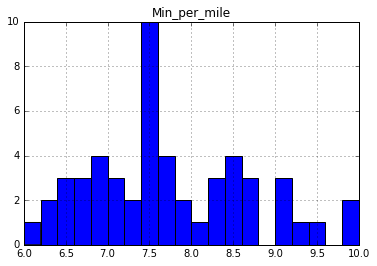

In [83]:
df.hist('Min_per_mile', bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f635d836950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f635ece94d0>]], dtype=object)

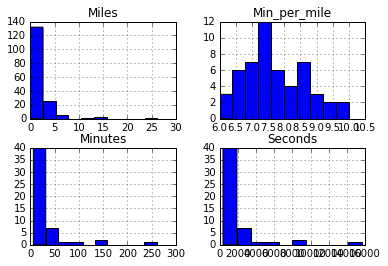

In [84]:
df.hist()

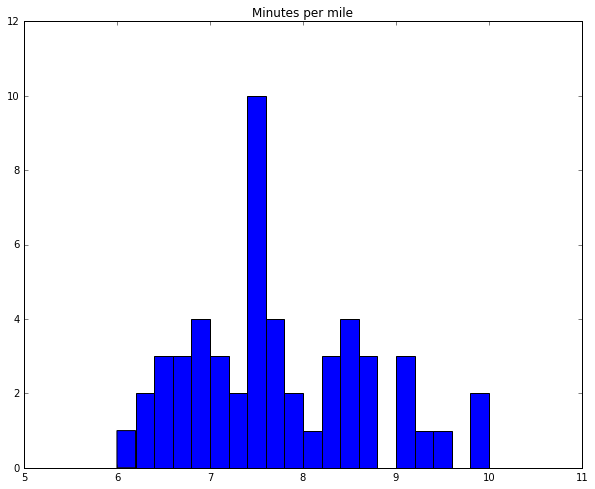

In [95]:
df.hist("Min_per_mile", bins=20, figsize=(10, 8))
plt.xlim((5, 11))
plt.ylim((0,12))
plt.title("Minutes per mile")
plt.grid(False)
plt.savefig('../../output/minutes_per_mile_hist.eps')

In [96]:
df.Miles

Date
2014-08-02     1.70
2014-08-03     1.40
2014-08-04     2.10
2014-08-05     0.00
2014-08-06     2.38
2014-08-07     2.30
2014-08-08     3.40
2014-08-09     2.50
2014-08-10     3.36
2014-08-11     1.67
2014-08-12     1.42
2014-08-13     2.35
2014-08-14     0.90
2014-08-14     0.90
2014-08-15     1.78
2014-08-16     0.65
2014-08-17     1.34
2014-08-18     0.65
2014-08-19     1.37
2014-08-19     1.37
2014-08-20     1.37
2014-08-21     1.37
2014-08-22     1.37
2014-08-23     1.34
2014-08-24     3.00
2014-08-25     1.37
2014-08-25     1.34
2014-08-26     1.37
2014-08-27     2.50
2014-08-28     0.00
              ...  
2014-12-04     0.00
2014-12-05     0.00
2014-12-06     0.00
2014-12-07     0.00
2014-12-08     0.00
2014-12-09     2.93
2014-12-10     0.00
2014-12-11     0.00
2014-12-12     1.37
2014-12-13     5.30
2014-12-13     2.21
2014-12-14     0.00
2014-12-15     6.50
2014-12-16     0.00
2014-12-17    12.00
2014-12-18     0.00
2014-12-19     3.10
2014-12-20    14.80
2014-12-21     

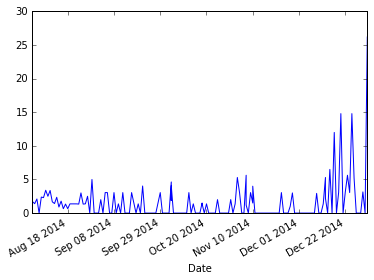

In [97]:

df.Miles.plot()

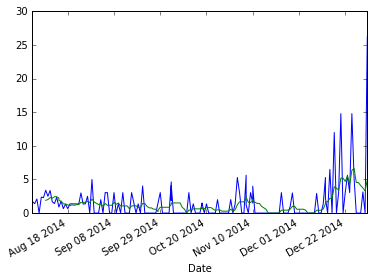

In [98]:
df.Miles.plot()
pd.rolling_mean(df.Miles, 7).plot()#show miles per week

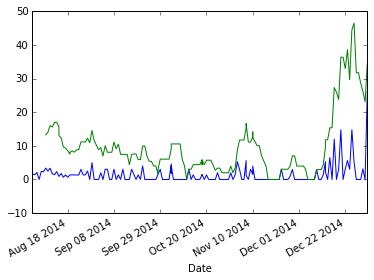

In [104]:

df.Miles.plot()
pd.rolling_sum(df.Miles, 7).plot()

In [105]:
df['2014-11':'2014-12']

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-11-01,0.00,NaN,NaN,NaN,NaN
2014-11-02,1.37,0:08:43,523,8.716667,6.362530
2014-11-03,5.30,0:39:26,2366,39.433333,7.440252
2014-11-04,3.05,0:22:12,1332,22.200000,7.278689
2014-11-05,0.00,NaN,NaN,NaN,NaN
2014-11-06,0.00,NaN,NaN,NaN,NaN
2014-11-07,5.63,0:49:05,2945,49.083333,8.718176
2014-11-07,1.26,NaN,NaN,NaN,NaN
2014-11-07,1.20,NaN,NaN,NaN,NaN


In [106]:
df['2014-12':'2014-11']

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,


In [109]:
df.loc['2014-8-12']

Miles              1.42
Time            0:10:35
Seconds             635
Minutes         10.5833
Min_per_mile    7.45305
Name: 2014-08-12 00:00:00, dtype: object

In [110]:
df.head()

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-08-02,1.70,NaN,NaN,NaN,NaN
2014-08-03,1.40,NaN,NaN,NaN,NaN
2014-08-04,2.10,NaN,NaN,NaN,NaN
2014-08-05,0.00,NaN,NaN,NaN,NaN
2014-08-06,2.38,NaN,NaN,NaN,NaN


In [112]:
df.reset_index()

,Date,Miles,Time,Seconds,Minutes,Min_per_mile
0,2014-08-02,1.70,NaN,NaN,NaN,NaN
1,2014-08-03,1.40,NaN,NaN,NaN,NaN
2,2014-08-04,2.10,NaN,NaN,NaN,NaN
3,2014-08-05,0.00,NaN,NaN,NaN,NaN
4,2014-08-06,2.38,NaN,NaN,NaN,NaN
5,2014-08-07,2.30,NaN,NaN,NaN,NaN
6,2014-08-08,3.40,NaN,NaN,NaN,NaN
7,2014-08-09,2.50,NaN,NaN,NaN,NaN
8,2014-08-10,3.36,0:28:37,1717,28.616667,8.516865
9,2014-08-11,1.67,0:13:07,787,13.116667,7.854291
